# Exercise 5.2: Build your own Sentiment Analysis Model

In [2]:
# 1. Get the stemmed data using the same process you did in Week 3

# Import the movie review data as a data frame and ensure that the data is loaded properly

import pandas as pd

moviereviews_df = pd.read_csv("Downloads/labeledTrainData.tsv", sep='\t')

In [3]:
# Convert all text to lowercase letters

moviereviews_df['review'] = moviereviews_df['review'].str.lower()

In [4]:
# Remove punctuation and special characters from the text

# Import library
import string

def removepunctuation(text):
    return ''.join([char for char in text if char not in string.punctuation])

moviereviews_df['review'] = moviereviews_df['review'].apply(removepunctuation)

In [5]:
# Remove stop words

# Import library
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

def stopwords(text):
    words = text.split()
    return ' '.join([word for word in words if word not in stop_words])

moviereviews_df['review'] = moviereviews_df['review'].apply(stopwords)

In [6]:
# Apply NLTK’s PorterStemmer

# Import library
from nltk.stem import PorterStemmer

porter = PorterStemmer()

def stemming(text):
    words = text.split()
    return ' '.join([porter.stem(word) for word in words])

moviereviews_df['review'] = moviereviews_df['review'].apply(stemming)

In [7]:
# 2. Split this into a training and test set (80% and 20%)

# Variables for the target

x = moviereviews_df['review']
y = moviereviews_df['sentiment']

In [8]:
# Import necessary package to use train_test_split function

from sklearn.model_selection import train_test_split

# Split the data and the target based on 80% training data and 20% test data

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2)

In [9]:
# 3. Fit and apply the tf-idf vectorization to the training set

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
trainmatrix = tfidf.fit_transform(xtrain)
trainmatrix.shape

(20000, 81332)

In [10]:
# 4. Apply but DO NOT FIT the tf-idf vectorization to the test set (Why?)

# We don't fit it it due to the fact we already fit it to the training set, so doing it to the test set will create an error
# in the results and misinterpreted data

testmatrix = tfidf.transform(xtest)
testmatrix.shape

(5000, 81332)

In [20]:
# 5. Train a logistic regression using the training data

# Import library
from sklearn.linear_model import LogisticRegression

logisticmodel = LogisticRegression()
trainmodel = logisticmodel.fit(trainmatrix, ytrain).predict(testmatrix)

In [21]:
# 6. Find the model accuracy on test set
# Accuracy is 88%

# Import library
from sklearn.metrics import accuracy_score

accuracy_score(ytest, trainmodel)

0.8842

In [23]:
# 7. Create a confusion matrix for the test set predictions

# Import library
from sklearn.metrics import confusion_matrix

confusionmatrix = confusion_matrix(ytest, trainmodel)
confusionmatrix

array([[2122,  301],
       [ 278, 2299]], dtype=int64)

In [27]:
# 8. Get the precision, recall, and F1-score for the test set predictions

# Import library
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculating precision for test set predicitions
precision = precision_score(ytest, trainmodel)

# Calculating recall for test set predictions
recall = recall_score(ytest, trainmodel)

# Calculating F1-score for test set predictions
f1_score = f1_score(ytest, trainmodel)

# Print results
print(f'Precision = {precision:.2f}')
print(f'Recall = {recall:.2f}')
print(f'F1-score = {f1_score:.2f}')

Precision = 0.88
Recall = 0.89
F1-score = 0.89


In [31]:
# 9. Create a ROC curve for the test set

# Import library
from sklearn.metrics import roc_curve, roc_auc_score

# Get the predicted probabilities

predprob = logisticmodel.predict_proba(testmatrix)[:,1]
predprob

array([0.89314643, 0.90881395, 0.86049474, ..., 0.95089481, 0.04892115,
       0.96507469])

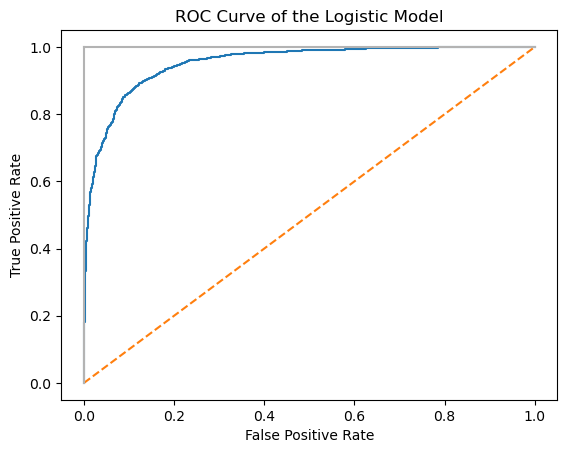

In [38]:
# Import library
import matplotlib.pyplot as plt

# Create True and False positive rates

fpositiverate, tpositiverate, thresholds = roc_curve(ytest, predprob)

# Plot the ROC curve for the test set

plt.plot(fpositiverate, tpositiverate)
plt.plot([0, 1], ls='--')
plt.plot([0, 0], [1, 0], c='.7'), plt.plot([1, 1] , c='.7')
plt.title('ROC Curve of the Logistic Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [63]:
# 10. Pick another classification model you learned about this week and repeat steps (5) – (9)

# For my second classification model I will be using the random forest classifier

# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier

# 5. Train a logistic regression using the training data 

rforestmodel = RandomForestClassifier()
rforesttrain = rforestmodel.fit(trainmatrix, ytrain).predict(testmatrix)

In [64]:
# 6. Find the model accuracy on test set
# Accuracy is 84%

accuracy_score(ytest, rforesttrain)

0.8404

In [65]:
# 7. Create a confusion matrix for the test set predictions

confusionmatrixrf = confusion_matrix(ytest, rforesttrain)
confusionmatrixrf

array([[2089,  334],
       [ 464, 2113]], dtype=int64)

In [69]:
# 8. Get the precision, recall, and F1-score for the test set predictions

# Import libraries
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculating precision for test set predicitions
precisionrf = precision_score(ytest, rforesttrain)

# Calculating recall for test set predictions
recallrf = recall_score(ytest, rforesttrain)

# Calculating F1-score for test set predictions
f1_scorerf = f1_score(ytest, rforesttrain)

# Print results
print(f'Precision = {precisionrf:.2f}')
print(f'Recall = {recallrf:.2f}')
print(f'F1-score = {f1_scorerf:.2f}')

Precision = 0.86
Recall = 0.82
F1-score = 0.84


In [67]:
# Get the predicted probabilities for the random forest model

predprobrf = rforestmodel.predict_proba(testmatrix)[:,1]
predprobrf

array([0.62, 0.73, 0.65, ..., 0.67, 0.23, 0.86])

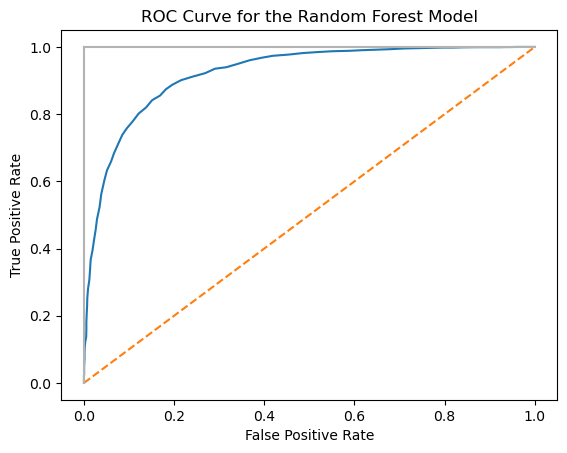

In [68]:
# Create True and False positive rates

fpositiverf, tpositiverf, thresholds = roc_curve(ytest, predprobrf)

# 9. Plot ROC curve for the test set

plt.plot(fpositiverf, tpositiverf)
plt.plot([0, 1], ls='--')
plt.plot([0, 0], [1, 0], c='.7'), plt.plot([1, 1] , c='.7')
plt.title('ROC Curve for the Random Forest Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()